## Power plant data 

Source : https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant#

Pycaret Regression : https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

## Citation :

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615, [Web Link].
([Web Link])

Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)

In [ ]:
pip install pycaret 

In [59]:
import pycaret
print('PyCaret: %s' % pycaret.__version__)

PyCaret: 2.3.0


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_excel("Folds5x2_pp.xlsx")

## Dataset Information

Features consist of hourly average ambient variables 
- Ambient Temperature (AT) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

## Feature Normalization?

## Dataset Exploration

In [4]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
df.count()

AT    9568
V     9568
AP    9568
RH    9568
PE    9568
dtype: int64

In [7]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [8]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [9]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [10]:
df.shape


(9568, 5)

In [11]:
print("There are {} observations and {} features in this dataset " . format(df.shape[0],df.shape[1]))

There are 9568 observations and 5 features in this dataset 


 In order to demonstrate the predict_model() function on unseen data, 
a sample of 1914 records have been withheld from the original dataset to be used for predictions. 

In [13]:
data = df.sample(frac=0.8, random_state=786)
data_unseen = df.drop(data.index)

In [14]:
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)


In [15]:
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (7654, 5)
Unseen Data For Predictions: (1914, 5)


In [16]:
from pycaret.regression import *
exp_reg = setup(data = data, target = 'PE', session_id=123)

,Description,Value
0,session_id,123
1,Target,PE
2,Original Data,"(7654, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(5357, 4)"


In [17]:
## Training all models on the current dataset to determine the best model

best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,2.4108,11.4715,3.3687,0.9603,0.0074,0.0053,0.5240
lightgbm,Light Gradient Boosting Machine,2.5896,12.6481,3.5436,0.9562,0.0078,0.0057,0.2930
rf,Random Forest Regressor,2.5640,12.8741,3.5780,0.9554,0.0078,0.0057,0.6770
et,Extra Trees Regressor,2.5238,13.0291,3.5983,0.9549,0.0079,0.0056,0.4670
gbr,Gradient Boosting Regressor,3.0199,16.0384,3.9955,0.9445,0.0088,0.0067,0.1930
knn,K Neighbors Regressor,3.1116,17.8972,4.2247,0.9380,0.0093,0.0069,0.0390
lr,Linear Regression,3.6357,21.1994,4.5986,0.9266,0.0101,0.0080,0.6720
ridge,Ridge Regression,3.6357,21.1994,4.5986,0.9266,0.0101,0.0080,0.0160
lar,Least Angle Regression,3.6357,21.1994,4.5986,0.9266,0.0101,0.0080,0.0160
br,Bayesian Ridge,3.6358,21.1994,4.5986,0.9266,0.0101,0.0080,0.0140


In [42]:
pip install xgboost

  Using cached xgboost-1.3.3-py3-none-macosx_10_14_x86_64.macosx_10_15_x86_64.macosx_11_0_x86_64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


**create_model**  trains and evaluates a model using cross validation that can be set with fold parameter. 
The output prints a score grid that shows MAE, MSE, RMSE, R2, RMSLE and MAPE by fold.

## Working with three candidate models best suited for this dataset

1. xgboost
2. lightgbm
3. rf

## 1. XGBoost

In [19]:
## 10 fold CV

xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.3848,10.9842,3.3142,0.9606,0.0073,0.0053
1,2.3924,10.4531,3.2331,0.9642,0.0071,0.0053
2,2.4254,10.8758,3.2979,0.9637,0.0073,0.0053
3,2.2840,8.9812,2.9969,0.9682,0.0066,0.0050
4,2.3822,8.9987,2.9998,0.9695,0.0066,0.0053
5,2.4296,10.0141,3.1645,0.9659,0.0070,0.0054
6,2.4780,17.6772,4.2044,0.9382,0.0092,0.0055
7,2.5791,14.3678,3.7905,0.9504,0.0083,0.0057
8,2.3625,10.6241,3.2595,0.9628,0.0072,0.0052
9,2.3903,11.7394,3.4263,0.9593,0.0076,0.0053


In [20]:
print(xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0)


## 2. LightGBM

In [21]:
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6040,12.5114,3.5371,0.9552,0.0077,0.0057
1,2.5276,11.2518,3.3544,0.9614,0.0074,0.0056
2,2.5557,11.9648,3.4590,0.9601,0.0076,0.0056
3,2.4857,10.2802,3.2063,0.9636,0.0070,0.0055
4,2.6384,11.0718,3.3274,0.9624,0.0073,0.0058
5,2.5642,10.9204,3.3046,0.9628,0.0073,0.0057
6,2.6518,18.3757,4.2867,0.9357,0.0094,0.0059
7,2.6403,14.8205,3.8497,0.9489,0.0084,0.0058
8,2.6534,12.3636,3.5162,0.9567,0.0077,0.0059
9,2.5752,12.9213,3.5946,0.9552,0.0079,0.0057


In [22]:
print(lgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## 3. Random Forest Regressor

In [23]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.5745,12.9636,3.6005,0.9536,0.0079,0.0057
1,2.5808,12.4596,3.5298,0.9573,0.0077,0.0057
2,2.4944,11.6559,3.4141,0.9611,0.0075,0.0055
3,2.5289,11.0159,3.3190,0.9610,0.0073,0.0056
4,2.5972,10.9193,3.3044,0.9629,0.0073,0.0057
5,2.5696,11.5377,3.3967,0.9607,0.0075,0.0057
6,2.5729,17.6047,4.1958,0.9384,0.0092,0.0057
7,2.7023,15.5447,3.9427,0.9464,0.0086,0.0060
8,2.5480,12.3918,3.5202,0.9566,0.0077,0.0056
9,2.4710,12.6479,3.5564,0.9561,0.0078,0.0054


In [24]:
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


## Model Tuning

In [41]:
tuned_xgboost = tune_model(xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.4163,11.2117,3.3484,0.9598,0.0073,0.0053
1,2.3764,10.6155,3.2581,0.9636,0.0071,0.0052
2,2.4573,11.1950,3.3459,0.9627,0.0074,0.0054
3,2.2295,8.6223,2.9364,0.9695,0.0064,0.0049
4,2.4552,10.1387,3.1841,0.9656,0.0070,0.0054
5,2.4278,10.2478,3.2012,0.9651,0.0071,0.0054
6,2.3953,16.7591,4.0938,0.9414,0.0090,0.0053
7,2.5496,14.2815,3.7791,0.9507,0.0083,0.0056
8,2.2321,10.0428,3.1690,0.9648,0.0070,0.0049
9,2.3334,11.7064,3.4215,0.9594,0.0075,0.0051


In [28]:
print(tuned_xgboost)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=7,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=290, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=2,
             reg_lambda=0.7, scale_pos_weight=37.1, subsample=0.7,
             tree_method='auto', validate_parameters=1, verbosity=0)


In [29]:
tuned_lightgbm = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.5692,13.0131,3.6074,0.9534,0.0079,0.0057
1,2.6689,12.7693,3.5734,0.9562,0.0078,0.0059
2,2.5785,11.7500,3.4278,0.9608,0.0075,0.0057
3,2.4234,10.0286,3.1668,0.9645,0.0070,0.0053
4,2.4867,10.0690,3.1732,0.9658,0.0070,0.0055
5,2.6287,11.8281,3.4392,0.9597,0.0076,0.0058
6,2.5850,17.9682,4.2389,0.9371,0.0093,0.0057
7,2.6148,14.9025,3.8604,0.9486,0.0084,0.0058
8,2.5477,11.8134,3.4371,0.9586,0.0076,0.0056
9,2.6718,13.6312,3.6920,0.9527,0.0081,0.0059


In [30]:
print(tuned_lightgbm)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [31]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.5969,12.8126,3.5795,0.9541,0.0078,0.0057
1,2.5860,11.9389,3.4553,0.9591,0.0076,0.0057
2,2.5895,12.3445,3.5135,0.9588,0.0077,0.0057
3,2.6404,11.6434,3.4122,0.9588,0.0075,0.0058
4,2.6119,10.8081,3.2876,0.9633,0.0072,0.0058
5,2.5991,11.2820,3.3589,0.9616,0.0074,0.0057
6,2.6805,18.4051,4.2901,0.9356,0.0094,0.0059
7,2.7230,15.3459,3.9174,0.9471,0.0086,0.0060
8,2.6364,12.7323,3.5682,0.9554,0.0078,0.0058
9,2.5781,13.2296,3.6373,0.9541,0.0080,0.0057


In [32]:
print(tuned_rf)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=11, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0002,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


## Plot a Model 



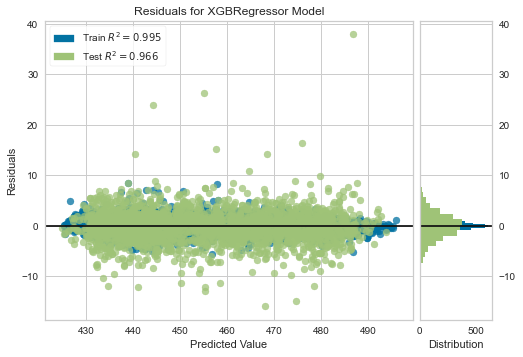

In [33]:
# Residual Plot

plot_model(tuned_xgboost)


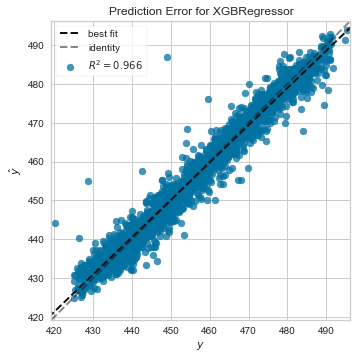

In [35]:
# Prediction Error Plot

plot_model(tuned_xgboost, plot = 'error')

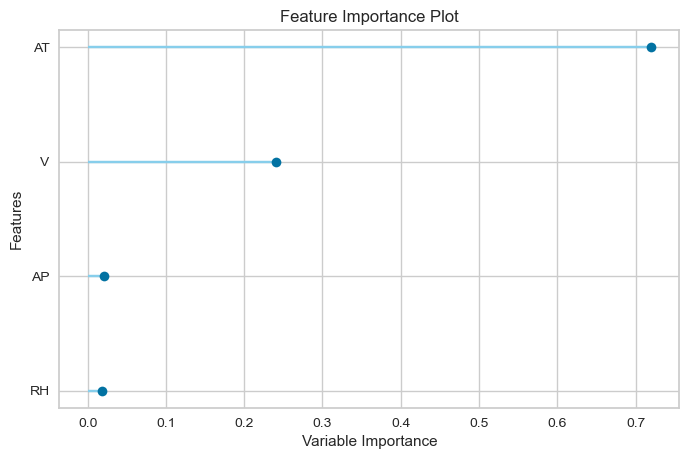

In [36]:
# Feature Importance Plot 

plot_model(tuned_xgboost, plot='feature')

Based on the plot above, ambient temperature (AT) contributes the most towards PE

## Plotting all graphs at once using the evaluate_model function

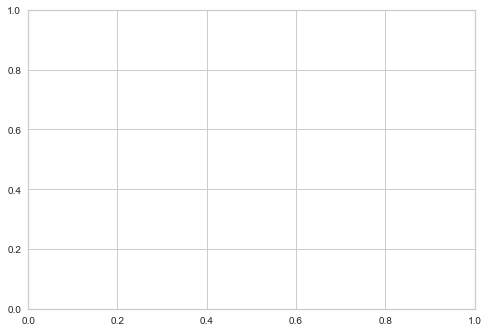

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [39]:
evaluate_model(tuned_xgboost)

## Prediction on Test Set

In [42]:
predict_model(tuned_xgboost);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2.2767,10.1624,3.1879,0.9657,0.0070,0.0050


Actual R2 : 0.9603

Predicted R2 : 0.9657
    

In [43]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2.5155,11.5669,3.4010,0.9609,0.0075,0.0055


Actual R2 : 0.9558

Predicted R2 : 0.9609
    

In [44]:
predict_model(tuned_rf);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2.5500,12.0772,3.4752,0.9592,0.0076,0.0056


Actual R2 : 0.9548

Predicted R2 : 0.9592
    

## Finalize Model for Deployment

In [46]:
final_xgb = finalize_model(tuned_xgboost)

In [47]:
print(final_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=7,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=290, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=2,
             reg_lambda=0.7, scale_pos_weight=37.1, subsample=0.7,
             tree_method='auto', validate_parameters=1, verbosity=0)


## Predict on Unseen Data

*The predict_model() function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the data_unseen parameter. data_unseen is the variable created at the beginning of the tutorial and contains 10% (1914) of the original dataset which was never exposed to PyCaret*

In [48]:
unseen_predictions = predict_model(final_xgb, data=data_unseen)
unseen_predictions.head()

,AT,V,AP,RH,PE,Label
0,25.18,62.96,1020.04,59.08,444.37,444.548798
1,26.27,59.44,1012.23,58.77,443.67,445.010315
2,14.64,45.00,1021.78,41.25,475.98,470.347473
3,24.34,73.50,1011.31,84.15,440.29,437.442474
4,14.45,52.75,1023.97,63.59,459.85,462.504578


The Label column is added onto the data_unseen set. Label is the predicted value using the final_lightgbm model. If you want predictions to be rounded, you can use round parameter inside predict_model(). You can also check the metrics on this since you have actual target column **PE** available. To do that we will use pycaret.utils module. See example below:

In [49]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.PE, unseen_predictions.Label, 'R2') 

0.9693

## Saving the Model 

In [50]:
save_model(final_xgb,'Final XGBoost Model 3March2021') # Saved using Pickle

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='PE',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='mea...
                               interaction_constraints='', learning_rate=0.15,
                               max_delta_step=0, max_depth=7, min_child_weight=3,
                               missing=nan, monotone_constraints='()',
                               n_estimators=290, n_jobs=-1, num_parallel_tree=1,


## Load the saved model and make predictions on unseen data

In [51]:
saved_final_xgboost = load_model('Final XGBoost Model 3March2021')

Transformation Pipeline and Model Successfully Loaded


In [52]:
new_pred = predict_model(saved_final_xgboost, data=data_unseen)

In [53]:
new_pred.head()

,AT,V,AP,RH,PE,Label
0,25.18,62.96,1020.04,59.08,444.37,444.548798
1,26.27,59.44,1012.23,58.77,443.67,445.010315
2,14.64,45.00,1021.78,41.25,475.98,470.347473
3,24.34,73.50,1011.31,84.15,440.29,437.442474
4,14.45,52.75,1023.97,63.59,459.85,462.504578


**Compare this with cell output # 48**

Conclusion : Saved Model works well with unseen data. 

In [54]:
from pycaret.utils import check_metric
check_metric(new_pred.PE, new_pred.Label, 'R2')

0.9693

**R2 identical to R2 obtained from prediction on unseen data.**

In [55]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [57]:
unseen_predictions["Label"][0]

444.5488